<a href="https://colab.research.google.com/github/mokshManchandani/data-science/blob/deeplearning-pytorch-udemy/GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

# GD in 1D

In [2]:
def f(x):
  return 3 * x ** 2 - 3 * x + 4

def derv(x):
  return 6 * x - 3


In [3]:
def get_data(): return np.linspace(-2,2,2001)

In [4]:
def plot_data_vs_derv(x, f_, derv_):
  plt.plot(x, f_(x), x, derv_(x))
  plt.xlim(x[[0, -1]])
  plt.grid()
  plt.xlabel('x')
  plt.ylabel('f(x) / dy/d(x)')
  plt.legend(['f(x)', 'dy/d(x)'])
  plt.show()

In [5]:
def perform_gd(x, derv_, learning_rate = 0.01,epochs = 100,has_default=False):
  # get a local minima
  local_minima = 0 if has_default else np.random.choice(x, 1)
  print(f"starting with initial value of {local_minima}")
  for step in range(epochs):
    local_minima = local_minima - learning_rate * derv_(local_minima)
  print(f"after {epochs} steps got the value of {local_minima}")
  return local_minima

In [6]:
def perform_gd_with_intermediate_steps(x, derv_,learning_rate = 0.01, epochs = 100, has_default=False):
  # get a local minima
  local_minima = 0 if has_default else np.random.choice(x, 1)
  print(f"starting with initial value of {local_minima}")
  model_params = np.zeros((epochs, 2))

  for step in range(epochs):
    grad = derv_(local_minima)
    local_minima = local_minima - learning_rate * grad
    model_params[step, 0] = local_minima[0] if isinstance(local_minima, np.ndarray) else local_minima
    model_params[step, 1] = grad[0]if isinstance(grad, np.ndarray) else grad
  if isinstance(local_minima, np.ndarray):
    local_minima = local_minima[0]
  print(f"after {epochs} steps got the value of {local_minima:.2f}")
  return model_params

In [7]:
def plot_gd_results(x, f_, derv_, localminima):
  plt.plot(x, f_(x), x, derv_(x))
  plt.plot(localminima, f_(localminima), 'ro')
  plt.plot(localminima, derv_(localminima), 'ro')
  plt.xlim(x[[0, -1]])
  plt.grid()
  plt.xlabel('x')
  plt.ylabel('f(x) / dy/d(x)')
  plt.legend(['f(x)', 'dy/d(x)', 'local minima'])
  plt.show()

In [8]:
def plot_gd_results_with_intermediate_steps(model_params):
  fig, axs = plt.subplots(1, 2, figsize=(12, 4))
  axs[0].plot(model_params[:,0],'o-')
  axs[0].set_xlabel('Step')
  axs[0].set_ylabel('Local Minima')
  axs[0].grid()
  axs[1].plot(model_params[:,1],'o-')
  axs[1].set_xlabel('Step')
  axs[1].set_ylabel('Gradient')
  axs[1].grid()

In [9]:
x = get_data()

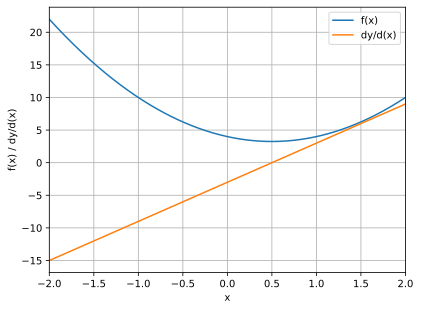

In [10]:
plot_data_vs_derv(x,f,derv)

starting with initial value of [1.746]
after 100 steps got the value of [0.50256037]


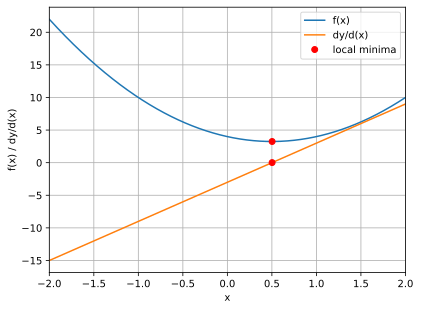

In [11]:
plot_gd_results(x,f, derv, perform_gd(x,derv))

starting with initial value of [0.652]
after 100 steps got the value of 0.50


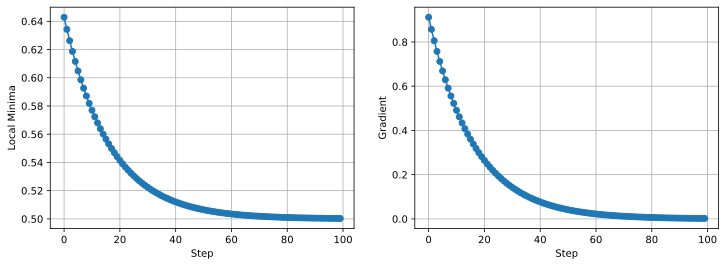

In [12]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x,derv))

starting with initial value of [1.204]
after 100 steps got the value of 5553580772755933288367200458996843796709456401602400263248077152845824.00


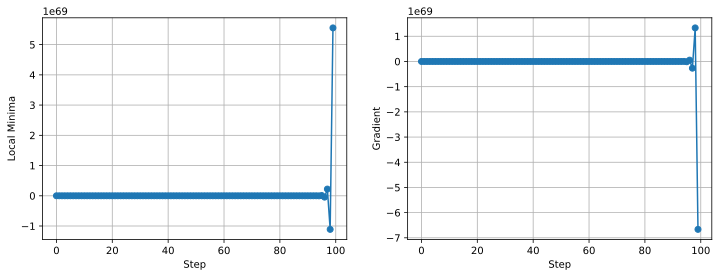

In [13]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x,derv,learning_rate=1))

starting with initial value of [1.026]
after 100 steps got the value of [4.14940836e+69]


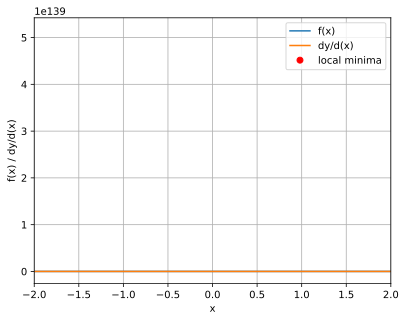

In [14]:
plot_gd_results(x,f, derv, perform_gd(x,derv,learning_rate=1))

starting with initial value of [-1.5]
after 100 steps got the value of -0.60


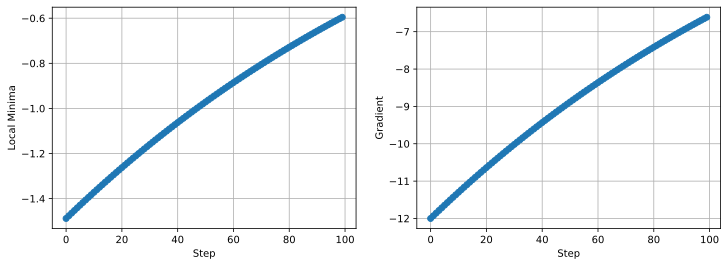

In [15]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x,derv,learning_rate=.001))

starting with initial value of [0.122]
after 100 steps got the value of [0.29292377]


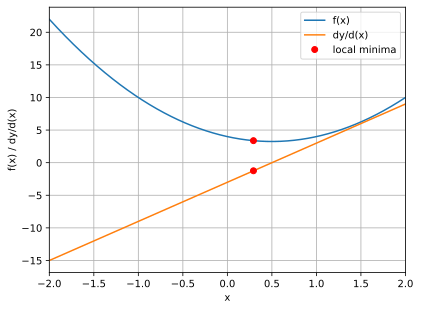

In [16]:
plot_gd_results(x,f, derv, perform_gd(x,derv,learning_rate=.001))

starting with initial value of [1.92]
after 1000 steps got the value of 0.50


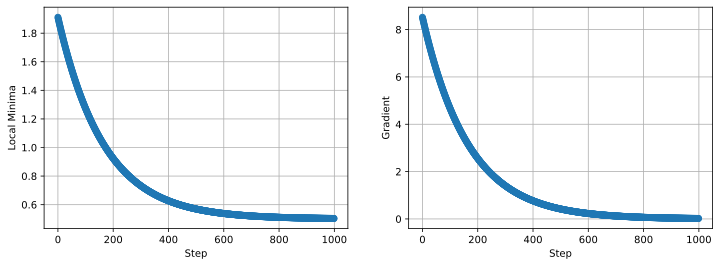

In [17]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x,derv,learning_rate=.001, epochs=1000))

starting with initial value of [0.606]
after 1000 steps got the value of [0.50025804]


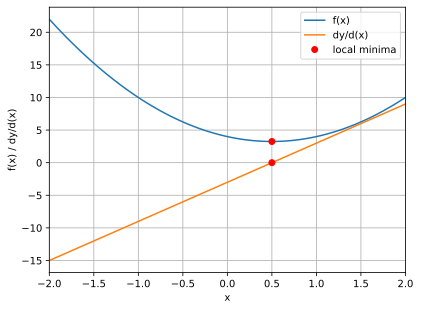

In [18]:
plot_gd_results(x,f, derv, perform_gd(x,derv,learning_rate=.001, epochs=1000))

# Code Challenge GD in 1D

differentiate the function :

```python
f(x) = cos(2 * math.pi * x) + x**2
```

use a constant starting value : ```x = 0```


In [19]:
x_symbol = sp.symbols('x')

In [20]:
f_x = sp.cos(2 * sp.pi * x_symbol) + x_symbol ** 2

In [21]:
sp.diff(f_x)

2*x - 2*pi*sin(2*pi*x)

In [22]:
def f(x):
  return np.cos(2 * np.pi * x) + x ** 2

def derv(x):
  return 2 * x - 2 * np.pi * np.sin(2 * np.pi * x)

In [23]:
x = get_data()

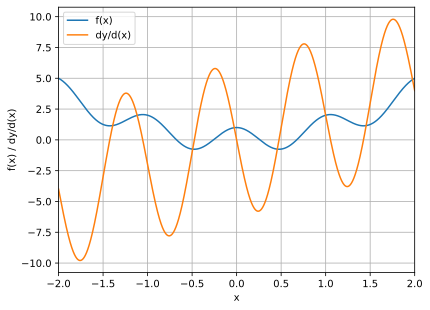

In [24]:
plot_data_vs_derv(x, f, derv)

starting with initial value of 0
after 100 steps got the value of 0.0


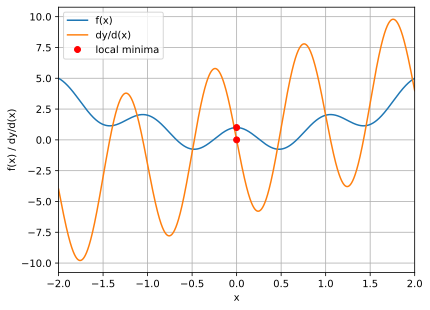

In [25]:
plot_gd_results(x, f, derv, perform_gd(x, derv, has_default=True))

starting with initial value of [1.088]
after 500 steps got the value of [1.4250674]


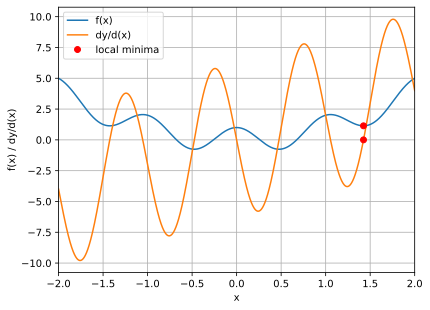

In [26]:
plot_gd_results(x, f, derv, perform_gd(x, derv, learning_rate=0.001,epochs=500,has_default=False))

starting with initial value of [1.944]
after 500 steps got the value of 1.43


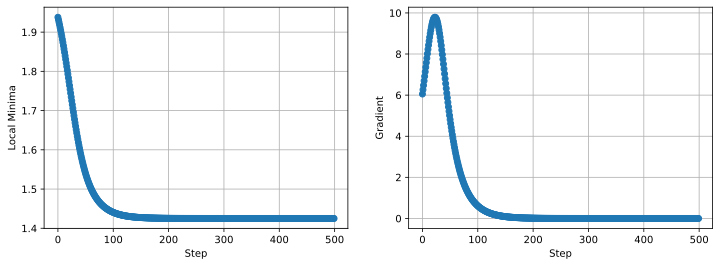

In [27]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x, derv, learning_rate=0.001, epochs=500,has_default=False))

starting with initial value of 0
after 100 steps got the value of 0.00


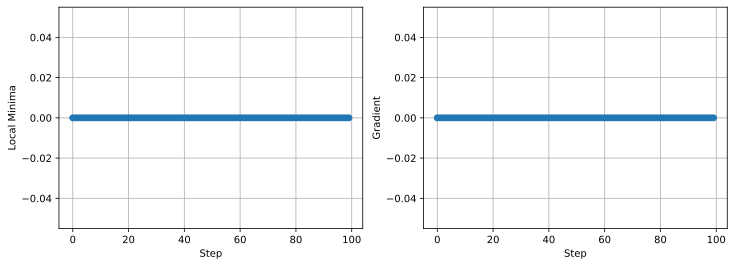

In [28]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x, derv, has_default=True))

# GD in 2D